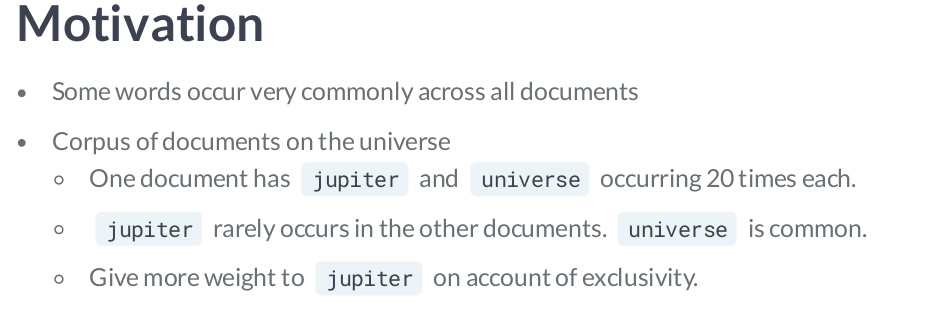

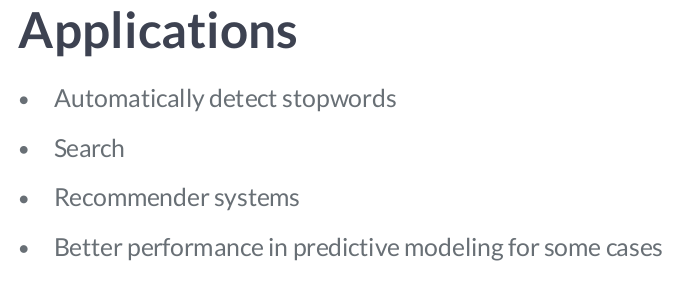

In [3]:
!wget https://assets.datacamp.com/production/repositories/4375/datasets/923cfcdab7e4297c2e3c4c859a5add798ae51d3b/ted.csv

--2020-02-28 00:37:56--  https://assets.datacamp.com/production/repositories/4375/datasets/923cfcdab7e4297c2e3c4c859a5add798ae51d3b/ted.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 54.192.151.54, 54.192.151.30, 54.192.151.57, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|54.192.151.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5636434 (5.4M) [text/csv]
Saving to: ‘ted.csv.1’

ted.csv.1           100%[===================>]   5.38M   371KB/s    in 16s     

2020-02-28 00:38:12 (355 KB/s) - ‘ted.csv.1’ saved [5636434/5636434]



In [2]:
import pandas as pd

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

corpus = pd.Series([
'The lion is the king of the jungle',
'Lions have lifespans of a decade',
'The lion is an endangered species'
])

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(corpus)

print(tfidf_matrix.toarray())

[[0.         0.         0.         0.         0.25434658 0.33443519
  0.33443519 0.         0.25434658 0.         0.25434658 0.
  0.76303975]
 [0.         0.46735098 0.         0.46735098 0.         0.
  0.         0.46735098 0.         0.46735098 0.35543247 0.
  0.        ]
 [0.45954803 0.         0.45954803 0.         0.34949812 0.
  0.         0.         0.34949812 0.         0.         0.45954803
  0.34949812]]


In [6]:
df = pd.read_csv('ted.csv.1')
df.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [7]:
ted = df.transcript

In [9]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


# Cosine similarity

In [10]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
# Define two 3-dimensional vectors A and B
A = (4,7,1)
B = (5,2,3)
# Compute the cosine score of A and B
score = cosine_similarity([A], [B])
# Print the cosine score
print(score)

[[0.73881883]]


# Movie Review

In [23]:
!wget https://assets.datacamp.com/production/repositories/4375/datasets/83f27c4ad045c098d3db5596154316e4ee0a28a8/movie_overviews.csv

--2020-02-28 01:21:30--  https://assets.datacamp.com/production/repositories/4375/datasets/83f27c4ad045c098d3db5596154316e4ee0a28a8/movie_overviews.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 54.192.151.30, 54.192.151.57, 54.192.151.84, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|54.192.151.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3384348 (3.2M) [text/csv]
Saving to: ‘movie_overviews.csv’

movie_overviews.csv 100%[===================>]   3.23M   344KB/s    in 9.6s    

2020-02-28 01:21:41 (345 KB/s) - ‘movie_overviews.csv’ saved [3384348/3384348]



In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_plots)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))

In [ ]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [ ]:
# Ted talk

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(transcripts)

# Generate the cosine similarity matrix
cosine_sim =  linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('5 ways to kill your dreams', cosine_sim, indices))

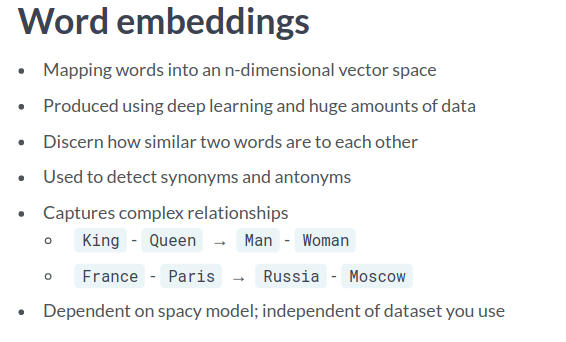